In [1]:
import numpy as np
import pandas as pd
import re #regular expression library
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

,0
id,int64
title,object
author,object
text,object
label,int64


In [9]:
# df=df.dropna(axis=0)

In [10]:
df=df.fillna('')

In [11]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [13]:
import matplotlib.pyplot as plt

In [14]:
print(f"Fake news :{len(df[df['label']==1])}")

print(f"Not-Fake news :{len(df[df['label']==0])}")

Fake news :10413
Not-Fake news :10387


<Axes: xlabel='label'>

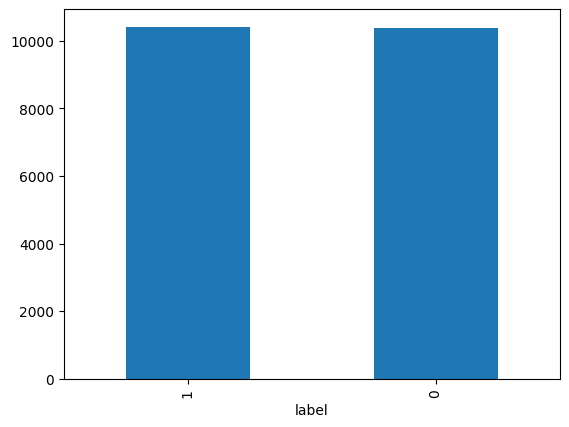

In [15]:
df['label'].value_counts().plot(kind='bar')

In [16]:
# we will use title,and author for our prediction as text is very large , it will take too much computational time and processing

In [17]:
# let us combine title and author together
df['content']=df['author']+' '+df['title']

In [18]:
df

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [19]:
# X=df.drop('label',axis=1)
# Y=pd.DataFrame(df['label'])

In [20]:
# X

In [21]:
# Y

In [22]:
# def transform_text(text):
#   text=text.lower()
#   ps=PorterStemmer()

#   y=[]

#   for i in text:
#         if i not in stopwords.words('english'):  # remove stop words and puncs
#             y.append(i)


#   text=y[:]
#   y.clear()

#   ps=PorterStemmer()
#   for i in text:     # stemming
#       y.append(ps.stem(i))

#   return " ".join(y)


In [23]:
# transform_text(df['content'][0])

In [24]:
df['content'][0]

'Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [25]:
def transform_text(content):
  processed=re.sub('^[a-zA-Z\s]',' ',content) #substitute numbers, commas or punctuations with space
  processed=processed.lower()
  ps=PorterStemmer()
  processed=processed.split()
  processed=[ps.stem(word) for word in processed if not word in stopwords.words('english') ]
  return ' '.join(processed)

In [26]:
transform_text(df['content'][0])

'arrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [27]:
df['content']=df['content'].apply(transform_text)

In [28]:
df

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,arrel lucu hous dem aide: didn’t even see come...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"aniel j. flynn flynn: hillari clinton, big wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,onsortiumnews.com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,essica purkiss 15 civilian kill singl us airst...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,oward portnoy iranian woman jail fiction unpub...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,erom hudson rapper t.i.: trump ’poster child w...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"enjamin hoffman n.f.l. playoffs: schedule, mat..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,ichael j. de la merc rachel abram macy’ said r...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"lex ansari nato, russia hold parallel exercis ..."


In [29]:
X=df['content'].values

In [30]:
Y=df['label'].values

In [31]:
X

array(['arrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet',
       'aniel j. flynn flynn: hillari clinton, big woman campu - breitbart',
       'onsortiumnews.com truth might get fire', ...,
       'ichael j. de la merc rachel abram macy’ said receiv takeov approach hudson’ bay - new york time',
       'lex ansari nato, russia hold parallel exercis balkan',
       'avid swanson keep f-35 aliv'], dtype=object)

In [32]:
tfidf=TfidfVectorizer() #TF-IDF decides importance of a word based on its frequency/repetation in the document and hence assigns a numerical value to that word


In [33]:
# X

In [34]:
# print(X)    # TF-idf is formated as (doc_id,word_id) importance of that word in that document

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y) #stratify so that classes of Y remains balanced in both train and test data

In [42]:
tfidf.fit(X_train)            #In TF-IDF, each document is represented as a vector.
X_train=tfidf.transform(X_train)

In [43]:
X_test

array(['eoffrey grider crook hillari risk ‘blue dress moment’ aggress attack fbi jame comey',
       'ichard sandomir raymond smullyan, puzzle-cr logician, die 97 - new york time',
       'taff writer fema ‘area emerg tests’ broadcast elect', ...,
       'illian art jump timelin',
       'mw_admin furiou parent slam ‘damaging’ bbc sex chang show aim six-year-old',
       'nne barnard aleppo close fall complet control syrian govern - new york time'],
      dtype=object)

In [44]:
       #In TF-IDF, each document is represented as a vector.
X_test=tfidf.transform(X_test)

In [45]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train,Y_train_pred)

In [46]:
Y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test,Y_test_pred)

In [47]:
print(f"train_accuracy : {train_accuracy}")
print(f"test_accuracy : {test_accuracy}")

train_accuracy : 0.9874399038461539
test_accuracy : 0.9790865384615385


In [48]:
# MAKING OUR PREDICTIVE SYSTEM :

def check(author,title):
  content=author+" "+title
  content=transform_text(content)
  X=tfidf.transform([content])
  Y=model.predict(X)
  if(Y[0]==1):
    print("Fake News")
  else:
    print("Real News")

In [49]:
check("John Doe", "Breaking News: AI Takes Over the World")


Fake News
